<a href="https://colab.research.google.com/github/PruthaKulkarni10/Synapse_LP/blob/week4/Copy_of_SynapseLP_Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 4**

## **DJS Synapse Learning Period**
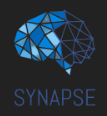

In the task for this week, we will be exploring another ML Models like Decision Tree, Random Forest and Naive Bayes. We will also learn hyperparameter tuning using ensemble techniques (Bagging & Boosting) and Decision Tree Pruning.

**This Task has various theory questions to be answered here and there. Don't miss out on those, as they will make you'll conceptually stronger, and give a better understanding.**

### Overfitting and Underfitting [VERY IMPORTANT]:
https://www.youtube.com/watch?v=T9NtOa-IITo
Note : This concept can be seen in K Means and decision trees. In fact, we will look deeper into
this when we begin deep learning.

# Decision Tree Classifier

* Theory : https://youtu.be/7VeUPuFGJHk
* Theory: https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/
* Implementation : https://youtu.be/HY2DcBhgwm0

Load the titanic dataset in a pandas dataframe (download dataset from https://www.kaggle.com/c/titanic/data and store it in the "Synapse" folder initially created for the interview tasks) Note that you have to download the train and test csv files seperately

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Synapse/train (1).csv')


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<b>Read the titanic_data.csv using pandas and show the dataframe</b>

### Visualizing hidden Details

* print the name column of the data
* notice that the word after the first comma encapsulates the title of the person (Mr., Mrs, etc)
* extract the title using regular expression (help given below in the code)
* store the title in a new column in the dataframe. Name the column : Title

In [3]:
# try researching about regex
#df.head(30)

import re
title = [x.split(',')[1] for x in df['Name']]
title = [re.search( r',\s(\w+).',x).group(1) for x in df['Name']]
df['Title'] = title
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


### Removing unnecessary columns
*   The columns PassengerId and Ticket play no logical role in being related to the survival of a passenger. Hence we will remove them.
*   We will also remove the Name column as we have done feature extraction and obtained titles instead. (test set might have extra titles which are not in the train set. Think about how we would consider them. This however doesn't affect task 1's objective)

In [4]:
#write code here
df.columns
df.drop(['PassengerId','Ticket','Name'], axis = 1, inplace = True)
df.reset_index()
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,NaN,S,Mr
1,1,1,female,38.0,1,0,71.2833,C85,C,Mrs
2,1,3,female,26.0,0,0,7.9250,NaN,S,Miss
3,1,1,female,35.0,1,0,53.1000,C123,S,Mrs
4,0,3,male,35.0,0,0,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S,Rev
887,1,1,female,19.0,0,0,30.0000,B42,S,Miss
888,0,3,female,NaN,1,2,23.4500,NaN,S,Miss
889,1,1,male,26.0,0,0,30.0000,C148,C,Mr


### Nan analysis
*   write code to find the percentage of Nans in each column and visualize it in a tabular format
*   remove any column having more than 50% Nans as they would be of no use

In [5]:
#write code here

missing_percent = df.isnull().sum()*100/len(df)
print(missing_percent)

df.drop(columns = ['Cabin'], inplace = True)
df.reset_index()

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
Title        0.000000
dtype: float64


,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,2,1,3,female,26.0,0,0,7.9250,S,Miss
3,3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,4,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Rev
887,887,1,1,female,19.0,0,0,30.0000,S,Miss
888,888,0,3,female,NaN,1,2,23.4500,S,Miss
889,889,1,1,male,26.0,0,0,30.0000,C,Mr


*   Fill Nans in the Embark column with the statistical mode
*   Fill Nans in the Age column with it's statistical mean

In [6]:
#write code here

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode())
df['Age'] = df['Age'].fillna(df['Age'].mean())
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.000000,1,0,7.2500,S,Mr
1,1,1,female,38.000000,1,0,71.2833,C,Mrs
2,1,3,female,26.000000,0,0,7.9250,S,Miss
3,1,1,female,35.000000,1,0,53.1000,S,Mrs
4,0,3,male,35.000000,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Rev
887,1,1,female,19.000000,0,0,30.0000,S,Miss
888,0,3,female,29.699118,1,2,23.4500,S,Miss
889,1,1,male,26.000000,0,0,30.0000,C,Mr


### Adding features to the dataset
*   Read the kaggle link (titanic dataset) provided above and see what the two columns SibSP and Parch signify
*   Using that create a new column called **Family_members**
*   Fill it with the sum of SibSP and Parch

In [7]:
#write code here
df['Family_members'] = df['SibSp'] + df['Parch']
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_members
0,0,3,male,22.000000,1,0,7.2500,S,Mr,1
1,1,1,female,38.000000,1,0,71.2833,C,Mrs,1
2,1,3,female,26.000000,0,0,7.9250,S,Miss,0
3,1,1,female,35.000000,1,0,53.1000,S,Mrs,1
4,0,3,male,35.000000,0,0,8.0500,S,Mr,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Rev,0
887,1,1,female,19.000000,0,0,30.0000,S,Miss,0
888,0,3,female,29.699118,1,2,23.4500,S,Miss,3
889,1,1,male,26.000000,0,0,30.0000,C,Mr,0


In [8]:
#Normalize the columns ("Age", "Fare", "Family_members")
from sklearn.preprocessing import MinMaxScaler

columns = ['Age', 'Fare', 'Family_members']
scaler = MinMaxScaler()
df[columns] = scaler.fit_transform(df[columns])
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_members
0,0,3,male,0.271174,1,0,0.014151,S,Mr,0.1
1,1,1,female,0.472229,1,0,0.139136,C,Mrs,0.1
2,1,3,female,0.321438,0,0,0.015469,S,Miss,0.0
3,1,1,female,0.434531,1,0,0.103644,S,Mrs,0.1
4,0,3,male,0.434531,0,0,0.015713,S,Mr,0.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0.334004,0,0,0.025374,S,Rev,0.0
887,1,1,female,0.233476,0,0,0.058556,S,Miss,0.0
888,0,3,female,0.367921,1,2,0.045771,S,Miss,0.3
889,1,1,male,0.321438,0,0,0.058556,C,Mr,0.0


In [9]:
#apply one hot encoding on the columns ('Pclass','Sex','Title','Embarked')

df = pd.get_dummies(data = df, columns = ['Pclass', 'Sex', 'Embarked','Title'])
df


,Survived,Age,SibSp,Parch,Fare,Family_members,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the
0,0,0.271174,1,0,0.014151,0.1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0.472229,1,0,0.139136,0.1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,1,0.321438,0,0,0.015469,0.0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
3,1,0.434531,1,0,0.103644,0.1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0.434531,0,0,0.015713,0.0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0.334004,0,0,0.025374,0.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
887,1,0.233476,0,0,0.058556,0.0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
888,0,0.367921,1,2,0.045771,0.3,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
889,1,0.321438,0,0,0.058556,0.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


<b>extract the y label (survived) from the dataframe and store it in a new variable</b>

In [10]:
#write code here
y = df['Survived']

<b>remove the y_label (survived) from the dataframe</b>

In [11]:
#write code here
X = df.drop('Survived', axis = 1)

<b>Split the data into train and test. (do a split in the ratio 70:30)</b>

In [12]:
#write code here
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 101, test_size = 0.3, shuffle = True)



<b>Now that you have the entire preprocessed and split data, implement the decision tree algorithm from sklearn and fit it to this dataset</b> <br>



In [13]:
#write code here

from sklearn.tree import DecisionTreeClassifier

decision = DecisionTreeClassifier(random_state = 10, max_depth = 30, min_samples_leaf=5, min_samples_split=3)
decision.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30, min_samples_leaf=5, min_samples_split=3,
                       random_state=10)

<b>Print the Model Accuracy</b>

In [14]:
#write code here

from sklearn.metrics import accuracy_score

decision.score(X_train, y_train)

0.8876404494382022

In [15]:
decision.score(X_test, y_test)

0.8134328358208955

## Explain: Give a Real life Example where Decision Tree Classifier can be used.

Ans:  Decision Tree algorithm is used in supervised ml in both classification and regression problems.In classification problems it works on the principle of if-else statements and used in regression problems where data is continuos like sales of a company. The simplest example can be the case of buying a car. We can take various paramters like budget, safety, price, colour and then reach a conclusion.

Now that you have your first result, make sure that you play with the hyperparameters to get a better result. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

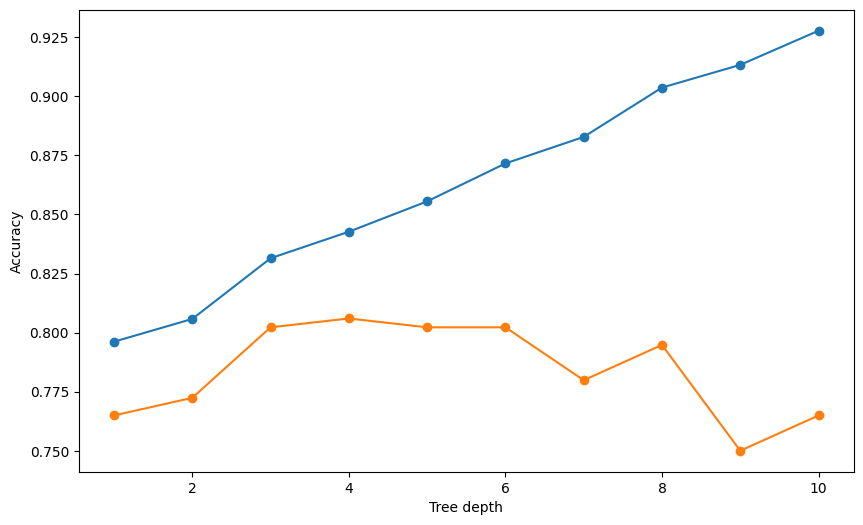

In [16]:
#plot a graph that shows the train and test accuracy for increasing depth of the tree (do for 10)
import matplotlib.pyplot as plt

train_accuracy = []
test_accuracy = []

for depth in range(1,11):
  decision = DecisionTreeClassifier(random_state = 10, max_depth = depth)
  decision.fit(X_train, y_train)

  train_acc = decision.score(X_train, y_train)
  train_accuracy.append(train_acc)

  test_acc = decision.score(X_test, y_test)
  test_accuracy.append(test_acc)

plt.figure(figsize=(10,6))
depth = list(range(1,11))
plt.plot(depth, train_accuracy, label = 'Training accuracy', marker = 'o')
plt.plot(depth, test_accuracy, label = 'Testing accuracy', marker = 'o')
plt.xlabel('Tree depth')
plt.ylabel('Accuracy')

plt.show()

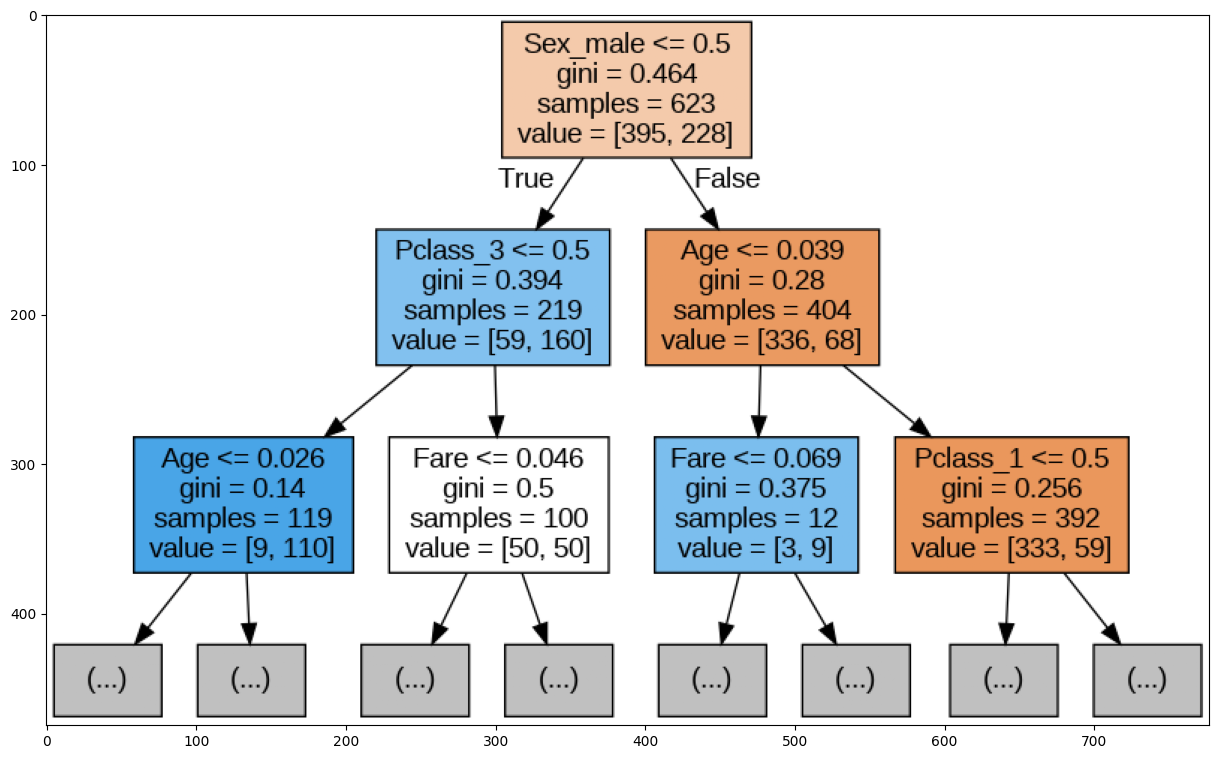

In [17]:
#complete the code below to create an image of the decision tree
from sklearn import tree
!pip install graphviz
decision_tree = tree.export_graphviz(decision, out_file='tree.dot', feature_names=X_train.columns, max_depth=2, filled=True)
!dot -Tpng tree.dot -o tree.png # to convert the file
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

<b>print the test accuracy and train accuracy here</b>

In [18]:
#write code here

print(train_accuracy)
print(test_accuracy)


[0.7961476725521669, 0.8057784911717496, 0.8314606741573034, 0.8426966292134831, 0.85553772070626, 0.8715890850722311, 0.8828250401284109, 0.9036918138041734, 0.913322632423756, 0.92776886035313]
[0.7649253731343284, 0.7723880597014925, 0.8022388059701493, 0.8059701492537313, 0.8022388059701493, 0.8022388059701493, 0.7798507462686567, 0.7947761194029851, 0.75, 0.7649253731343284]


## Explain: What is your understanding of the charts you made above?

Ans: There is not much change in testing accuracy even after increasing the depth of the tree where as the training accuracy increases after increasing the depth of the tree.

# Naive Bayes Algorithm

* Theory : https://youtu.be/jS1CKhALUBQ
* Theory:
https://www.analyticsvidhya.com/blog/2021/09/naive-bayes-algorithm-a-complete-guide-for-data-science-enthusiasts/
* Implementation : https://youtu.be/nHIUYwN-5rM

## Explain: What is the difference between Decision Tree Classifier and Naive Bayes algorithm?

Ans: The major difference between the two algorithms is that all features are treated as independent in Naive Bayes hence chances of the model overfitting are lesser compared to Decision Tree classifer. Whereas features may or may not be treated as dependent while using Decision Tree Classifier leading to overfitting especially in the case of a simple decision tree.
Consequently, Naive Bayes can work well with fewer data points than Decision Tree

## Optimizing Methods

In [22]:
# Write a code to implement naive bayes algorithm, and give the accuracy for the same
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print(accuracy)

0.7761194029850746


We can even use Ensemble Methods like **bagging (random forest)**, **boosting (adaboost)** and **Pruning** to improve your accuracy. Again creating a loop of hyperparameters and then finding the best among them is a daunting task. To reduce the efforts, we can use a special technique known as **GridSearchCV**. It finds the best hyperparameters for your model without you having to write multiple loops and evaluating them.

1. GridSearchCV for Random Forest Classifier: https://youtu.be/c4mS7KaOIGY
2. GridSearchCV for Adaboost Classifier: https://youtu.be/JmXnztjULnQ

### 1. Bagging

* Theory : https://www.youtube.com/watch?v=KIOeZ5cFZ50
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* Implementation : https://www.youtube.com/watch?v=MxiktOPmhV8&t=2s

In [40]:
#write code here
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num =10)]
max_depth = [2,4]
min_samples_split = [2,5]
min_samples_leaf = [1,2]
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap }

rf_Grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv=3, verbose=2, n_jobs = 4)
rf_Grid.fit(X_train, y_train)
rf_Grid.best_params_

print(rf.score(X_test, y_test))

Fitting 3 folds for each of 160 candidates, totalling 480 fits
0.8059701492537313


## Explain: Under what condition will Random Forest and Decision Trees have the same accuracy?

Ans: Only if the data is simple or there very less chances of overfitting

## Extra - BaggingClassifier

In [39]:
#write a code to implement BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

bagging = BaggingClassifier(base_estimator=None)

n_estimators = [10, 20, 30, 40, 50]
max_samples = [0.5, 0.7, 0.9]
max_features = [0.5, 0.7, 0.9]
bootstrap = [True, False]

param_grid = {
    'n_estimators': n_estimators,
    'max_samples': max_samples,
    'max_features': max_features,
    'bootstrap': bootstrap
}

bagging_Grid = GridSearchCV(estimator=bagging, param_grid=param_grid, cv=3, verbose=2, n_jobs=4)
bagging_Grid.fit(X_train, y_train)

print("Best parameters:", bagging_Grid.best_params_)

best_bagging = bagging_Grid.best_estimator_
accuracy = best_bagging.score(X_test, y_test)
print(accuracy)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
Best parameters: {'bootstrap': False, 'max_features': 0.5, 'max_samples': 0.7, 'n_estimators': 50}
0.832089552238806


## Explain: What is the difference between Random Forest and Bagging Classifier

Ans: Random forest only works with decision trees whereas bagging is compatible with any algorithm.
In bagging, if there is one strong independent variable, then it dominates the learning process of the model as opposed to in random forest, it randomly selects a variable which results in better learning and more accurate predictions


### 2. Boosting

* Theory : https://www.youtube.com/watch?v=NLRO1-jp5F8&t=724s
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
* Implementation : https://www.youtube.com/watch?v=7xHM93WXOu8

In [35]:
#write code here
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

adamodel=AdaBoostClassifier(n_estimators=100,learning_rate=1)
model=adamodel.fit(X_train,y_train)
y_pred=model.predict(X_test)

grid = dict()
grid['n_estimators'] = [10,50,100,500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid = grid, n_jobs=-1, cv=10, scoring='accuracy')
grid_result = grid_search.fit(X_train,y_train)
print(grid_result.best_score_, grid_result.best_params_)

0.823399897593446 {'learning_rate': 0.01, 'n_estimators': 500}


## Explain: What is the difference between Bagging and Boosting?

Ans: Boosting attempts to build strong classifiers from weak classifiers.Firstly, a model is built from the training data. Then the second model is built which tries to correct the errors present in the first model. This procedure is continued and models are added until either the complete training data set is predicted correctly or the maximum number of models is added.

In bagging, Multiple subsets are created from the original data set with equal tuples, selecting observations with replacement. A base model is created on each of these subsets.Each model is learned in parallel with each training set and independent of each other. The final predictions are determined by combining the predictions from all the models.

### 3. Pruning Techniques

https://towardsdatascience.com/build-better-decision-trees-with-pruning-8f467e73b107

In [38]:
#write code here
from sklearn.metrics import make_scorer
from sklearn.model_selection import ParameterGrid

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(ccp_alpha=0.01)
clf.fit(X_train, y_train)

print(clf.score(X_test, y_test))

0.7947761194029851


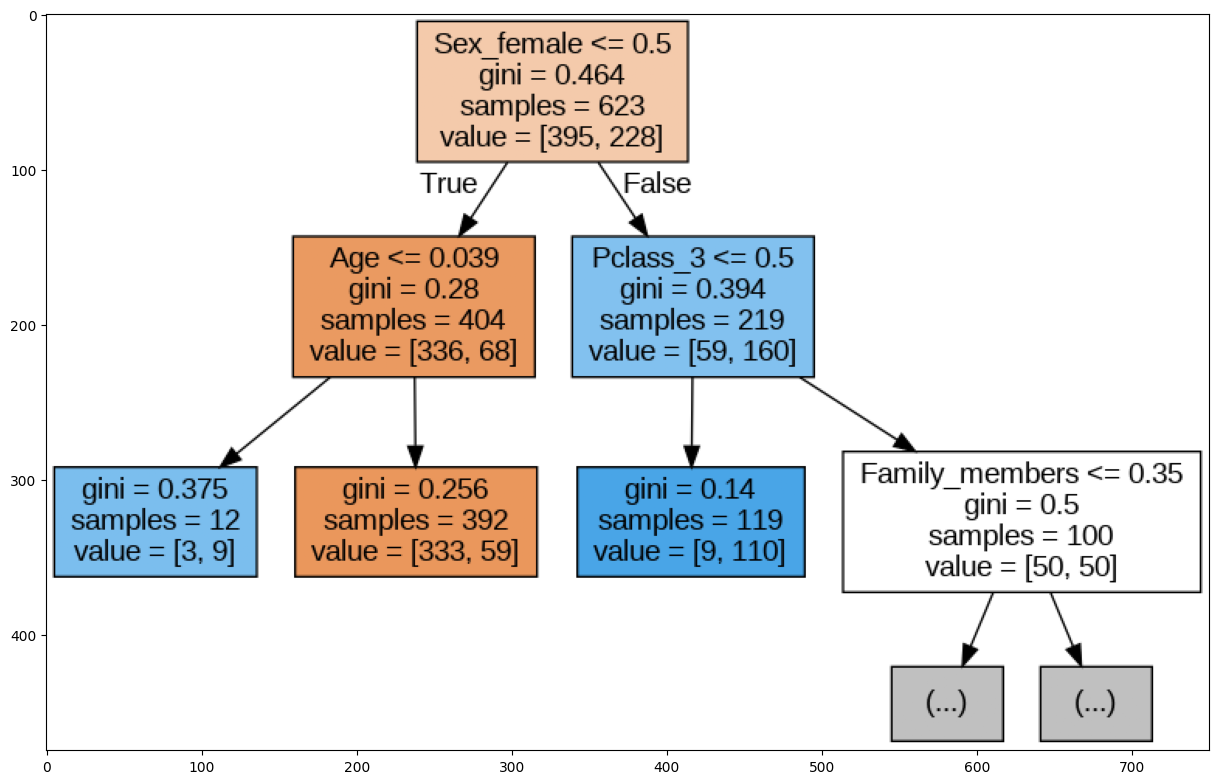

In [27]:
#plot a tree (image) similar to one created for decision tree (graphwiz) for the pruning technique
from sklearn import tree
!pip install graphviz
decision_tree = tree.export_graphviz(clf , out_file='tree.dot', feature_names=X_train.columns, max_depth=2, filled=True)
!dot -Tpng tree.dot -o tree.png # to convert the file
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

<b>Note that the accuracy on the test set will be considered and brownie points for *not* overfitting the model in the process</b>

## Explain: After studying these techniques, analyse which method gives you the best accuracy and choose it as your most optimal model.

Ans:


# **Bonus: To be done only if you have completed the above tasks.**

You can research and create a short blog on the topic of **XG Boost Classifier and Regressor**. The best research will be edited and featured on the Synapse Instagram page. Happy coding! :)

XGBoost stands for “Extreme Gradient Boosting”

One of the key features of XGBoost is its efficient handling of missing values, which allows it to handle real-world data with missing values without requiring significant pre-processing. Additionally, XGBoost has built-in support for parallel processing, making it possible to train models on large datasets in a reasonable amount of time.



# **End of Task**

> ©DJS Synapse 2023 - 2024